In [1]:
import os
import sys 
sys.path.insert(0, '/home/aiwenxu/2022-xu-retinal-degeneration')

**Part 1: running retina simulation**

In [2]:
import numpy as np
from model.retinasim_phase12.simulation import stim_to_retina_output
from model.retinasim_phase12.simulation_utils import SimulationParam
import pickle
from brian2 import *

In [4]:
pre_computed_weights_folder = "../model/weights_phase12"

for light_g_max in [0.9, 0.75, 0.6, 0.45, 0.3, 0.15, 0]:
    for cone_population in [100, 80, 60, 40, 20]:
        
        sp_txt = "../model/parameter/cottaris_original_2hz.txt"
        sp = SimulationParam(sp_txt)
        
        sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
        sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)
        
        cr_coordinates = np.load("{}/CR.npy".format(sp.xy_coord_folder))
        NUM_CR = cr_coordinates.shape[1]

        l_b = 0.5
        l = [1, 0.75, 0.5, 0.25, 0]

        square_waves = []

        for i in range(5):
            part = np.ones((NUM_CR)) * l[i]
            part = np.tile(part, (200,1))
            square_waves.append(part)
            if i != 4:
                square_waves.append(np.tile(np.ones((NUM_CR)) * l_b, (100, 1)))
        stim = TimedArray(np.concatenate(square_waves, axis=0), dt=1*ms)
        
        time_in_ms = stim.values.shape[0]
        select_GPU = 1
        genn_directory = "GeNNworkspace_{}".format(select_GPU)
        _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = stim_to_retina_output(time_in_ms, sp, light_g_max, pre_computed_weights_folder, lstim=stim, select_GPU=select_GPU, genn_directory=genn_directory, dt=0.1)
        
        data_folder = "../data/fig6/data-{}-{}".format(light_g_max, cone_population)
        if not os.path.exists(data_folder):
            os.makedirs(data_folder)
            
        with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
            pickle.dump(spikes_gl_on, f)

        with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
            pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 169.6594579219818
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 155.88907885551453
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:

executing genn binary on GPU ...
simulation time: 117.36373543739319
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 169.6372652053833
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 156.86967945098877
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-build

In [ ]:
# special case: cone population 0%

cone_population = 0
for light_g_max in [0.9, 0.75, 0.6, 0.45, 0.3, 0.15, 0]:
        
    sp_txt = "../model/parameter/cottaris_original_2hz.txt"
    sp = SimulationParam(sp_txt)

    sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(100)
    sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(100)
    sp.cone_exists = False

    NUM_CR = 1

    l_b = 0.5
    l = [1, 0.75, 0.5, 0.25, 0]

    square_waves = []

    for i in range(5):
        part = np.ones((NUM_CR)) * l[i]
        part = np.tile(part, (200,1))
        square_waves.append(part)
        if i != 4:
            square_waves.append(np.tile(np.ones((NUM_CR)) * l_b, (100, 1)))
    stim = TimedArray(np.concatenate(square_waves, axis=0), dt=1*ms)

    time_in_ms = stim.values.shape[0]
    select_GPU = 1
    genn_directory = "GeNNworkspace_{}".format(select_GPU)
    _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = stim_to_retina_output(time_in_ms, sp, light_g_max, pre_computed_weights_folder, lstim=stim, select_GPU=select_GPU, genn_directory=genn_directory, dt=0.1)

    data_folder = "../data/fig6/data-{}-{}".format(light_g_max, cone_population)
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_on, f)

    with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 88.31562423706055
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 89.10431790351868
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/

**Part 2: calculate firing rate**

In [6]:
def cal_firing_rate(path_to_spikes):
    
    with open(path_to_spikes, 'rb') as f:
        spikes = pickle.load(f)
    
    data = np.zeros((len(spikes['t'].keys()), 5))
    time_start = np.array([0, 300, 600, 900, 1200]) + 100
    time_end = time_start + 100
    for idx in spikes['t']:
        sp = spikes['t'][idx]
        for j in range(5):
            data[idx][j] += sp[(sp > time_start[j]*ms) & (sp < time_end[j]*ms)].shape[0]/(100*ms)
    return data

In [8]:
def save_firing_rate(cell_type):
    fr_dict = {}
    for light_g in [0.9, 0.75, 0.6, 0.45, 0.3, 0.15, 0]:
        for cone_percent in [0, 20, 40, 60, 80, 100]:
            fr_dict["{}_{}".format(light_g, cone_percent)] = cal_firing_rate("../data/fig6/data-{}-{}/spikes_gl_{}.pickle".format(light_g, cone_percent, cell_type))
    with open("../data/fig6/{}_rgc_fr.pickle".format(cell_type), 'wb') as f:
        pickle.dump(fr_dict, f)

In [9]:
save_firing_rate("on")

In [10]:
save_firing_rate("off")

**Part 3: plotting**

In [11]:
with open("../data/fig6/on_rgc_fr.pickle", 'rb') as f:
    on_fr = pickle.load(f)
with open("../data/fig6/off_rgc_fr.pickle", 'rb') as f:
    off_fr = pickle.load(f)

In [27]:
def get_heatmap(fr_dict):
    heatmap = []
    for i in range(4, -1, -1):
        current = np.zeros((7, 6))
        for (j, light_g) in enumerate(reversed([0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9])):
            for (k, cone_percent) in enumerate(reversed([0, 20, 40, 60, 80, 100])):
                key = "{}_{}".format(light_g, cone_percent)
                current[j][k] = np.mean(fr_dict[key], axis=0)[i]
        heatmap.append(current)
    return heatmap

In [28]:
on_off_heatmap = [get_heatmap(on_fr), get_heatmap(off_fr)]

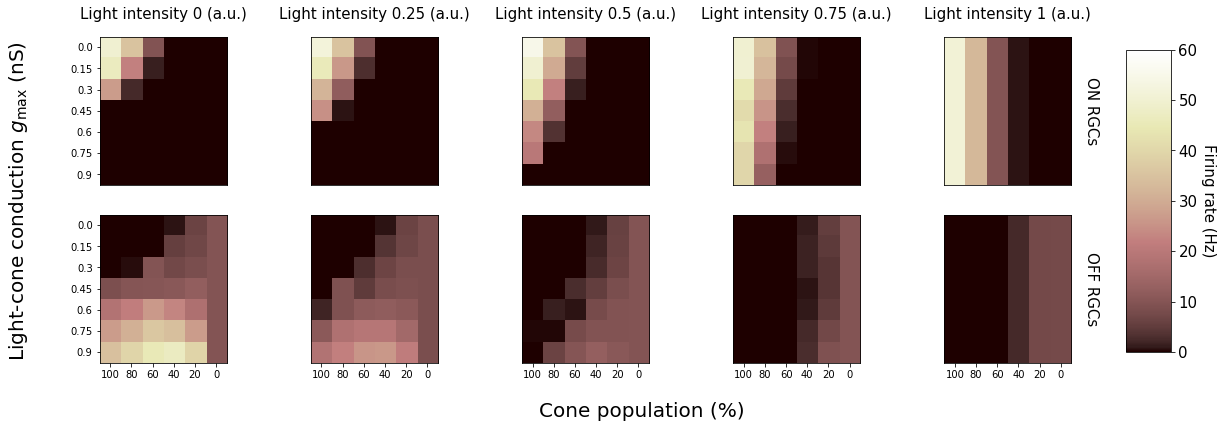

In [29]:
fig, axs = plt.subplots(2, 5, figsize=(21,6))
fig.text(0.5, 0, 'Cone population (%)', ha='center', fontsize=20)
fig.text(0.08, 0.5, 'Light-cone conduction $g_{\max}$ (nS)', va='center', rotation='vertical', fontsize=20)
light_intensity = [0, 0.25, 0.5, 0.75, 1]
for i in range(2):
    for j in range(5):
        im = axs[i][j].imshow(on_off_heatmap[i][j], cmap="pink", vmin=0, vmax=60, origin="lower")
        if i == 0:
            axs[i][j].set_xticks([])
        else:
            axs[i][j].set_xticks([0, 1, 2, 3, 4, 5])
            axs[i][j].set_xticklabels(reversed([0, 20, 40, 60, 80, 100]), fontsize=10)
        if j != 0:
            axs[i][j].set_yticks([])
        else:
            axs[i][j].set_yticks([0, 1, 2, 3, 4, 5, 6])
            axs[i][j].set_yticklabels(reversed([0.00, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90]), fontsize=10)
        if i == 0:
            axs[i][j].set_xlabel("Light intensity {} (a.u.)".format(light_intensity[j]), fontsize=15)
            axs[i][j].xaxis.set_label_coords(0.5,1.2)
axs[0][4].set_ylabel("ON RGCs", rotation=270, fontsize=15)
axs[0][4].yaxis.set_label_coords(1.1,0.5)
axs[1][4].set_ylabel("OFF RGCs", rotation=270, fontsize=15)
axs[1][4].yaxis.set_label_coords(1.1,0.5)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('Firing rate (Hz)', rotation=270, labelpad=18, fontsize=15)
_ = cbar_ax.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=15)

In [30]:
def get_on_spon_rate(on_fr_dict, cone_percent):
    on_fr_mean = []
    on_fr_std = []
    for g_max in reversed([0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9]):
        key = "{}_{}".format(g_max, cone_percent)
        rate = on_fr_dict[key][:, 2]
        on_fr_mean.append(np.mean(rate))
        on_fr_std.append(np.std(rate))
    return np.array(on_fr_mean), np.array(on_fr_std)

In [32]:
on_fr_mean, on_fr_std = get_on_spon_rate(on_fr, 100)

Text(0.5, 1.0, 'ON RGCs, cone population = 100%')

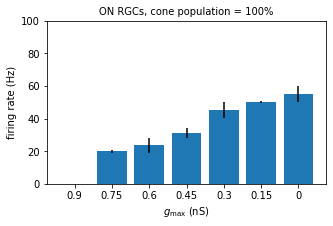

In [33]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

labels = list(reversed(["0", "0.15", "0.3", "0.45", "0.6", "0.75", "0.9"]))

ax.bar(labels, on_fr_mean, yerr=on_fr_std)
ax.set_ylim((0,100))
ax.set_ylabel("firing rate (Hz)", fontsize=10)
ax.set_xlabel("$g_{\max}$ (nS)")
ax.set_title("ON RGCs, cone population = 100%", fontsize=10)

In [35]:
on_fr_mean, on_fr_std = get_on_spon_rate(on_fr, 60)

Text(0.5, 1.0, 'ON RGCs, cone population = 60%')

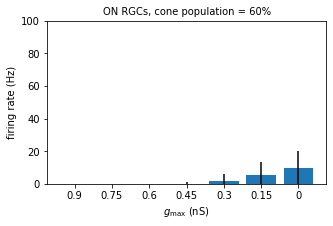

In [36]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

labels = list(reversed(["0", "0.15", "0.3", "0.45", "0.6", "0.75", "0.9"]))

ax.bar(labels, on_fr_mean, yerr=on_fr_std)
ax.set_ylim((0,100))
ax.set_ylabel("firing rate (Hz)", fontsize=10)
ax.set_xlabel("$g_{\max}$ (nS)")
ax.set_title("ON RGCs, cone population = 60%", fontsize=10)

In [37]:
def get_off_spon_rate(off_fr_dict, g_max):
    off_fr_mean = []
    off_fr_std = []
    for cone_percent in reversed([0, 20, 40, 60, 80, 100]):
        key = "{}_{}".format(g_max, cone_percent)
        rate = off_fr_dict[key][:, 2]
        off_fr_mean.append(np.mean(rate))
        off_fr_std.append(np.std(rate))
    return np.array(off_fr_mean), np.array(off_fr_std)

In [38]:
off_fr_mean, off_fr_std = get_off_spon_rate(off_fr, 0.9)

Text(0.5, 1.0, 'OFF RGCs, $g_{\\max}$ = 0.9 nS')

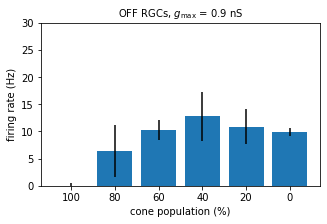

In [39]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

labels = list(reversed(["0", "20", "40", "60", "80", "100"]))

ax.bar(labels, off_fr_mean, yerr=off_fr_std)
ax.set_ylim((0,30))
ax.set_ylabel("firing rate (Hz)", fontsize=10)
ax.set_xlabel("cone population (%)")
ax.set_title("OFF RGCs, $g_{\max}$ = 0.9 nS", fontsize=10)

In [40]:
off_fr_mean, off_fr_std = get_off_spon_rate(off_fr, 0.45)

Text(0.5, 1.0, 'OFF RGCs, $g_{\\max}$ = 0.45 nS')

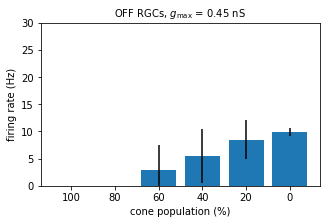

In [41]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

labels = list(reversed(["0", "20", "40", "60", "80", "100"]))

ax.bar(labels, off_fr_mean, yerr=off_fr_std)
ax.set_ylim((0,30))
ax.set_ylabel("firing rate (Hz)", fontsize=10)
ax.set_xlabel("cone population (%)")
ax.set_title("OFF RGCs, $g_{\max}$ = 0.45 nS", fontsize=10)